In [1]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (891, 12)
Test shape: (418, 11)


In [3]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked']  = test['Embarked'].fillna(test['Embarked'].mode()[0])


In [6]:
train['Age'] = train.groupby(['Sex', 'Pclass'])['Age'].transform(
    lambda x: x.fillna(x.median())
)

test['Age'] = test.groupby(['Sex', 'Pclass'])['Age'].transform(
    lambda x: x.fillna(x.median())
)


In [7]:
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)


In [8]:
train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [9]:
import pandas as pd

# Step 1: Load the CSVs
train = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")  # <--- this line creates test_df

# Step 3: Save cleaned files in the same folder as the notebook
train.to_csv("train_cleaned.csv", index=False)
test_df.to_csv("test_cleaned.csv", index=False)

print("Files saved successfully in the current folder!")


Files saved successfully in the current folder!


In [10]:
# To see first 5 rows of cleaned train dataset
train.head()

# To see first 5 rows of cleaned test dataset
test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


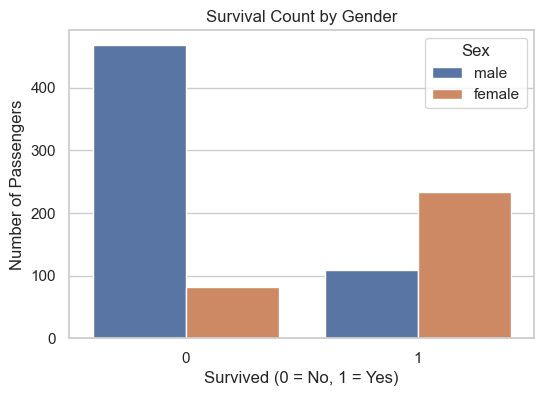

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Survival count by gender
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.show()


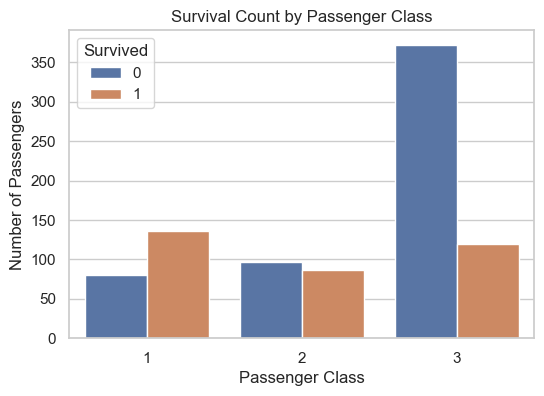

In [12]:
# Survival count by passenger class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()


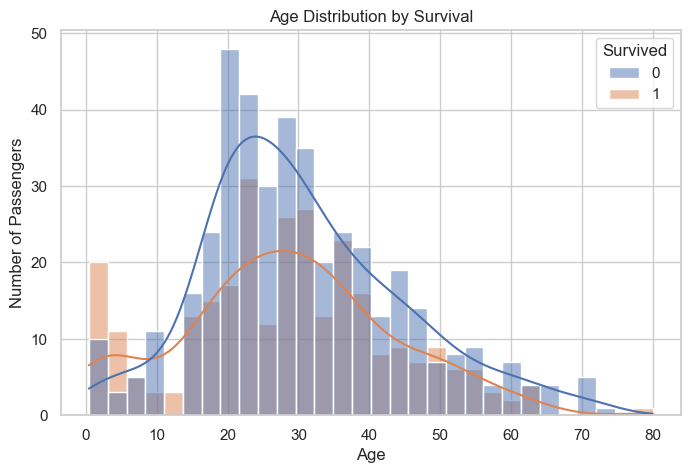

In [13]:
# Age distribution by survival
plt.figure(figsize=(8,5))
sns.histplot(data=train, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()


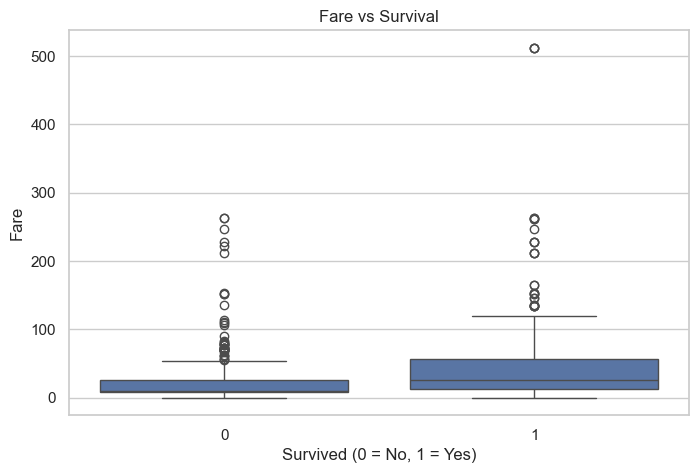

In [14]:
# Fare distribution by survival
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title('Fare vs Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


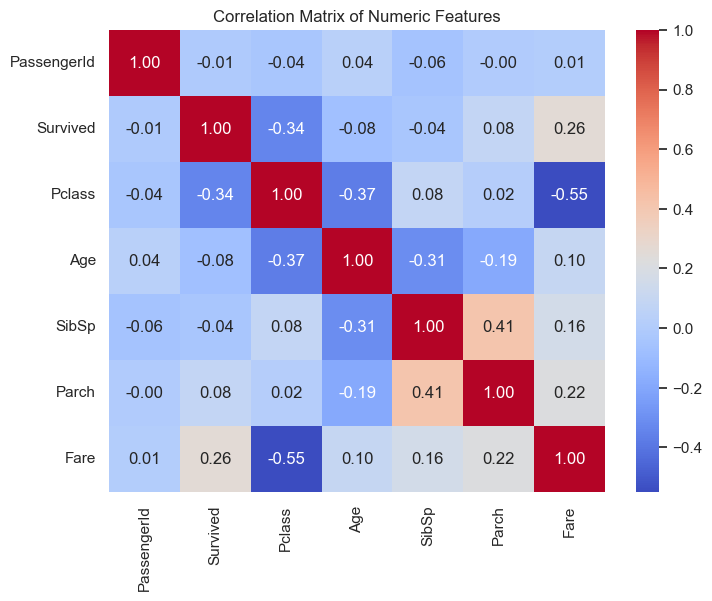

In [15]:
# Correlation heatmap (numeric features only)
plt.figure(figsize=(8,6))

# Select only numeric columns
numeric_features = train.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_features.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [16]:
# Separate features and target
X = train.drop('Survived', axis=1)  # all features
y = train['Survived']               # target

# Optional: check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (891, 11)
y shape: (891,)


In [17]:
from sklearn.model_selection import train_test_split

# 80% train, 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])


Training samples: 712
Validation samples: 179


In [18]:
X_train.dtypes


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
# Extract Title from Name
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
train['Title'] = train['Title'].apply(lambda x: x if x in common_titles else 'Rare')

# For test set as well if you need later
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Title'].apply(lambda x: x if x in common_titles else 'Rare')


In [20]:
# Drop columns not used for ML
X = train.drop(['Survived', 'Name', 'Ticket'], axis=1)

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Separate target
y = train['Survived']

# Check dtypes to ensure all numeric
print(X.dtypes)


PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Sex_male          bool
Embarked_Q        bool
Embarked_S        bool
Title_Miss        bool
Title_Mr          bool
Title_Mrs         bool
Title_Rare        bool
dtype: object


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)


X_train shape: (712, 14)
X_val shape: (179, 14)


In [22]:
# Check data types
print(X_train.dtypes)


PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Sex_male          bool
Embarked_Q        bool
Embarked_S        bool
Title_Miss        bool
Title_Mr          bool
Title_Mrs         bool
Title_Rare        bool
dtype: object


In [23]:
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
train['Title'] = train['Title'].replace(
    ['Lady', 'Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare'
)


In [24]:
X = train.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = train['Survived']


In [25]:
X = pd.get_dummies(X, columns=['Sex', 'Embarked', 'Title'], drop_first=True)


In [26]:
print(X.dtypes)


PassengerId             int64
Pclass                  int64
Age                   float64
SibSp                   int64
Parch                   int64
Fare                  float64
Cabin                  object
Sex_male                 bool
Embarked_Q               bool
Embarked_S               bool
Title_Miss               bool
Title_Mlle               bool
Title_Mme                bool
Title_Mr                 bool
Title_Mrs                bool
Title_Ms                 bool
Title_Rare               bool
Title_the Countess       bool
dtype: object


In [27]:
import pandas as pd

# Drop unnecessary string columns and separate target
drop_cols = ['Name', 'Ticket', 'Cabin', 'PassengerId']
X = train.drop(columns=drop_cols + ['Survived'])  # Features only
y = train['Survived']



In [28]:
# Convert categorical columns to numeric
# 'Sex' and 'Embarked' are converted using one-hot encoding
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)


In [29]:
from sklearn.model_selection import train_test_split

# Split data (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [30]:
from sklearn.preprocessing import StandardScaler

# List of numeric columns to scale
numeric_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and validation
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])


In [31]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])


In [32]:
print(X_train.columns)


Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [33]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'Sex_male', 'Embarked_Q', 'Embarked_S']

X_train = X_train[features]
X_val = X_val[features]


In [34]:
from sklearn.preprocessing import LabelEncoder

le_title = LabelEncoder()
X_train['Title'] = le_title.fit_transform(X_train['Title'])
X_val['Title'] = le_title.transform(X_val['Title'])


In [35]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title']  # all numeric now
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])


In [36]:
# Fill missing numeric values without chained assignment
for col in ['Age', 'Fare', 'SibSp', 'Parch', 'Title']:
    X_train[col] = X_train[col].fillna(X_train[col].median())
    X_val[col] = X_val[col].fillna(X_val[col].median())




In [37]:
from sklearn.preprocessing import LabelEncoder

le_title = LabelEncoder()
X_train['Title'] = le_title.fit_transform(X_train['Title'])
X_val['Title'] = le_title.transform(X_val['Title'])


In [38]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])


In [39]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train, y_train)

print("Logistic Regression trained successfully.")


Logistic Regression trained successfully.


In [40]:
# Predict survival (0 or 1)
y_val_pred = log_model.predict(X_val)

# Predict survival probability (optional)
y_val_prob = log_model.predict_proba(X_val)[:, 1]


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Detailed Classification Report
print("Classification Report:")
print(classification_report(y_val, y_val_pred))


Validation Accuracy: 0.8101
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



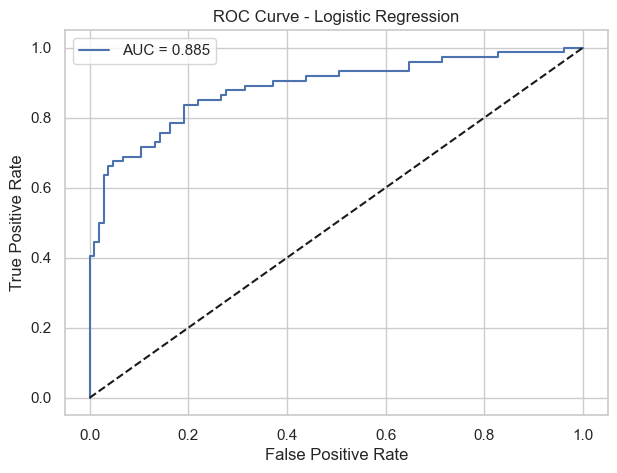

In [42]:
# Step 1: Predict survival probability for positive class
y_prob = log_model.predict_proba(X_val)[:, 1]  # probability of class 1 (survived)

# Step 2: Compute ROC AUC score
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(y_val, y_prob)

# Step 3: Compute False Positive Rate (fpr) and True Positive Rate (tpr)
fpr, tpr, _ = roc_curve(y_val, y_prob)

# Step 4: Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [44]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [45]:
y_pred_rf = rf_model.predict(X_val)
y_prob_rf = rf_model.predict_proba(X_val)[:, 1]


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_accuracy = accuracy_score(y_val, y_pred_rf)
print("Random Forest Validation Accuracy:", rf_accuracy)

print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))

print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))


Random Forest Validation Accuracy: 0.8100558659217877

Confusion Matrix:
 [[86 19]
 [15 59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       105
           1       0.76      0.80      0.78        74

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.81       179
weighted avg       0.81      0.81      0.81       179



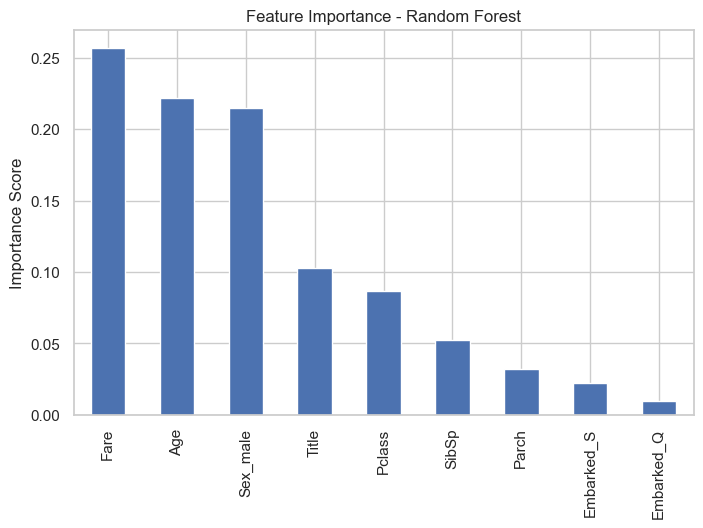

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.Series(
    rf_model.feature_importances_, 
    index=X_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feature_importance.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.show()


In [48]:
# Predict probabilities for Random Forest
y_prob_rf = rf_model.predict_proba(X_val)[:, 1]


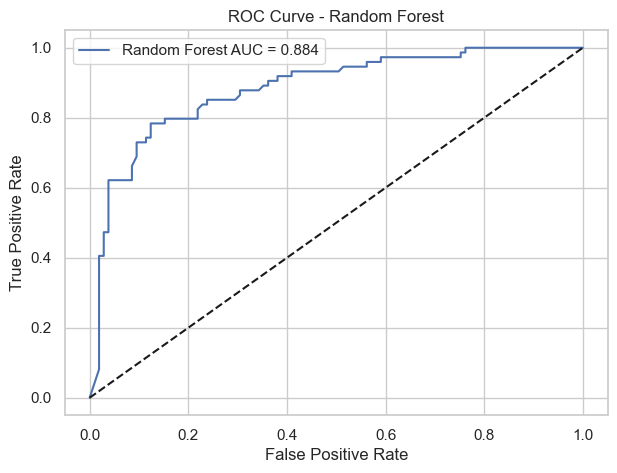

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

roc_auc_rf = roc_auc_score(y_val, y_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_prob_rf)

plt.figure(figsize=(7,5))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest AUC = {roc_auc_rf:.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


In [50]:
# Combine train + validation data
X_full = pd.concat([X_train, X_val])
y_full = pd.concat([y_train, y_val])

# Train final Random Forest model
rf_final = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_final.fit(X_full, y_full)


RandomForestClassifier(n_estimators=200, random_state=42)

In [51]:
from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',
    C=1,
    gamma='scale',
    probability=True,   # ⭐ REQUIRED for ROC-AUC
    random_state=42
)

svm_model.fit(X_train, y_train)

print("SVM trained successfully")



SVM trained successfully


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_svm = svm_model.predict(X_val)

svm_accuracy = accuracy_score(y_val, y_pred_svm)
print("SVM Validation Accuracy:", svm_accuracy)

print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_svm))

print("\nClassification Report:\n", classification_report(y_val, y_pred_svm))


SVM Validation Accuracy: 0.8156424581005587

Confusion Matrix:
 [[93 12]
 [21 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



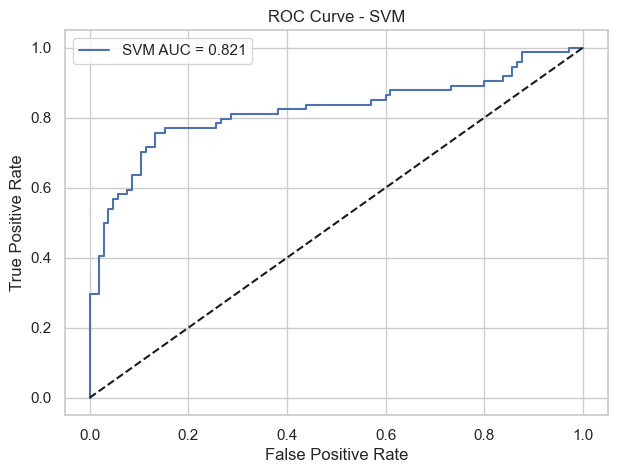

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_prob_svm = svm_model.predict_proba(X_val)[:, 1]

roc_auc_svm = roc_auc_score(y_val, y_prob_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_val, y_prob_svm)

plt.figure(figsize=(7,5))
plt.plot(fpr_svm, tpr_svm, label=f'SVM AUC = {roc_auc_svm:.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()


####Train Linear SVM

In [54]:
svm_linear = SVC(
    kernel='linear',
    probability=True,
    random_state=42
)

svm_linear.fit(X_train, y_train)


SVC(kernel='linear', probability=True, random_state=42)

###Extract coefficients (acts like feature importance

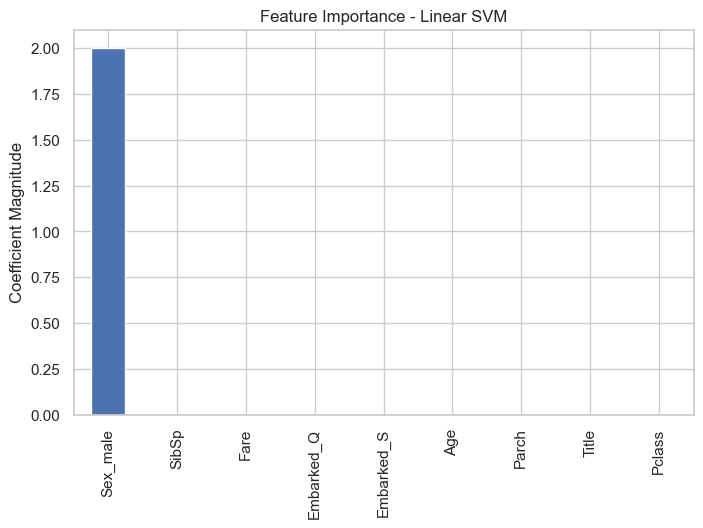

In [55]:
import pandas as pd

svm_feature_importance = pd.Series(
    abs(svm_linear.coef_[0]),
    index=X_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
svm_feature_importance.plot(kind='bar')
plt.title("Feature Importance - Linear SVM")
plt.ylabel("Coefficient Magnitude")
plt.show()


In [56]:
X = pd.get_dummies(X, columns=['Title'], drop_first=True)  # drop_first avoids dummy variable trap


In [57]:
print(X.dtypes)


Pclass                  int64
Age                   float64
SibSp                   int64
Parch                   int64
Fare                  float64
Sex_male                 bool
Embarked_Q               bool
Embarked_S               bool
Title_Miss               bool
Title_Mlle               bool
Title_Mme                bool
Title_Mr                 bool
Title_Mrs                bool
Title_Ms                 bool
Title_Rare               bool
Title_the Countess       bool
dtype: object


In [58]:
import pandas as pd

# Load cleaned training data
df = pd.read_csv("train_cleaned.csv")

# See all column names
print(df.columns.tolist())


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [59]:
import pandas as pd

# Load cleaned & encoded training dataset
data = pd.read_csv('train_cleaned.csv')

# Separate features and target
X_cv = data.drop('Survived', axis=1)
y_cv = data['Survived']

# Check that all columns are numeric
print(X_cv.dtypes)


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

# Logistic Regression
log_model = LogisticRegression(max_iter=5000)

# SVM
svm_model = SVC(kernel='rbf', probability=True)


In [61]:
import pandas as pd

data = pd.read_csv('train_cleaned.csv')

X = data.drop('Survived', axis=1)
y = data['Survived']


In [62]:
print(X.dtypes[X.dtypes == 'object'])


Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object


In [63]:
X = X.drop(columns=['Name'])


In [64]:
# Convert Sex to numeric
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})


In [65]:
print(X.dtypes[X.dtypes == 'object'])


Ticket      object
Cabin       object
Embarked    object
dtype: object


In [66]:
X = X.drop(columns=['Ticket'])


In [67]:
print(X.dtypes[X.dtypes == 'object'])


Cabin       object
Embarked    object
dtype: object


In [68]:
print(X.isnull().sum())


PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [69]:
# Fill missing values using median (best for skewed data)
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())


In [70]:
print(X.isnull().sum())


PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
log_model = LogisticRegression(max_iter=5000)
svm_model = SVC(kernel='rbf', probability=True)


In [73]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Features & target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Column types
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# Preprocessing
numeric_transformer = SimpleImputer(strategy="median")

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# ✅ MODEL PIPELINE (THIS WAS MISSING)
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ))
])


In [74]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    model,
    X,
    y,
    cv=5,
    scoring="accuracy"
)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.7877095  0.80898876 0.85393258 0.78651685 0.83146067]
Mean CV Accuracy: 0.8137216747222397


###Step 1: Prepare Test Data

In [75]:

# Drop unnecessary columns from test data
X_test = test_df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

# Encode categorical columns (same as training)
X_test = pd.get_dummies(X_test, columns=['Sex', 'Embarked'], drop_first=True)

# Make sure all columns match the training data
missing_cols = set(X_full.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # Add any missing columns with 0

# Reorder columns to match training data exactly
X_test = X_test[X_full.columns]



####Step 2: Scale Numeric Columns

In [76]:
# Fill missing numeric values in X_test
for col in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title']:
    X_test[col] = X_test[col].fillna(X_train[col].median())

# Scale numeric features using the same scaler
numeric_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title']
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


KeyError: 'Title'

####Step 3: Predict with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Predict survival (0 or 1)
test_predictions = rf_final.predict(X_test)

# Optional: predict probability of survival
test_probabilities = rf_final.predict_proba(X_test)[:, 1]


In [ ]:
# Create a DataFrame for submission
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": test_predictions
})

# Save submission CSV in the same folder as notebook
submission.to_csv("titanic_submission.csv", index=False)

print("Submission file created successfully.")
